In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')

In [4]:
train_set = pd.read_csv('Train.csv')
test_set = pd.read_csv('Test.csv')
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [5]:
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


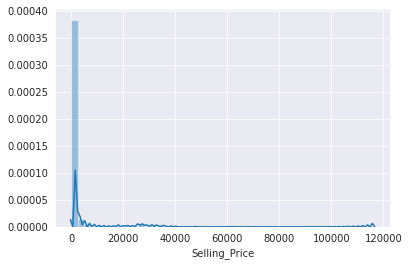

In [6]:
sns.distplot(train_set.loc[:,'Selling_Price'])

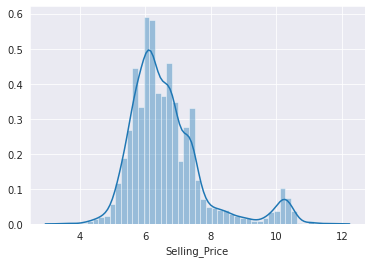

In [7]:
train_set.loc[:,'Selling_Price'] = np.log1p(train_set.loc[:,'Selling_Price'])
sns.distplot(train_set.loc[:,'Selling_Price'])

In [10]:
train_set.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

In [13]:
pd.set_option('display.max_rows', 1_000)

In [23]:
train_set.loc[:,'Product_Brand'].value_counts()

B-3078    688
B-133      91
B-2679     42
B-2372     40
B-1517     35
         ... 
B-1748      1
B-376       1
B-323       1
B-1958      1
B-1596      1
Name: Product_Brand, Length: 1010, dtype: int64

In [25]:
train_set.loc[:, 'Date_Year'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.year
train_set.loc[:, 'Date_Month'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.month
train_set.loc[:, 'Date_Day'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.day
train_set.loc[:, 'Date_Dayofweek'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.dayofweek
train_set.loc[:, 'Date_Is_weekday'] = np.where(train_set.loc[:, 'Date_Dayofweek'].isin([0,1,2,3,4]),1,0)
train_set.loc[:, 'Date_DayOfyear'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.dayofyear
train_set.loc[:, 'Date_Week'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.week 
train_set.loc[:, 'Date_Quarter'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.quarter
train_set.loc[:, 'Date_Semester'] = np.where(train_set.loc[:, 'Date_Quarter'].isin([1,2]),1,2)   
train_set.loc[:, 'Date_Is_month_start'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.is_month_start 
train_set.loc[:, 'Date_Is_month_end'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.is_month_end 
train_set.loc[:, 'Date_Is_quarter_start'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.is_quarter_start
train_set.loc[:, 'Date_Is_quarter_end'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.is_quarter_end 
train_set.loc[:, 'Date_Is_year_start'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.is_year_start 
train_set.loc[:, 'Date_Is_year_end'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.is_year_end
train_set.loc[:, 'Date_Days_in_month'] = pd.to_datetime(train_set.loc[:, 'Date']).dt.days_in_month
train_set.drop(columns=['Date'], axis=1, inplace=True)
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2017,2,3,4,1,34,5,1,1,False,False,False,False,False,False,28
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,2015,7,1,2,1,182,27,3,2,True,False,True,False,False,False,31
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,2019,1,12,5,0,12,2,1,1,False,False,False,False,False,False,31
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,2014,12,12,4,1,346,50,4,2,False,False,False,False,False,False,31
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,2013,12,12,3,1,346,50,4,2,False,False,False,False,False,False,31


In [26]:
train_set.loc[:, 'Date_Is_month_start'] = train_set.loc[:, 'Date_Is_month_start'].astype(int)
train_set.loc[:, 'Date_Is_month_end'] = train_set.loc[:, 'Date_Is_month_end'].astype(int)
train_set.loc[:, 'Date_Is_quarter_start'] = train_set.loc[:, 'Date_Is_quarter_start'].astype(int)
train_set.loc[:, 'Date_Is_quarter_end'] = train_set.loc[:, 'Date_Is_quarter_end'].astype(int)
train_set.loc[:, 'Date_Is_year_start'] = train_set.loc[:, 'Date_Is_year_start'].astype(int)
train_set.loc[:, 'Date_Is_year_end'] = train_set.loc[:, 'Date_Is_year_end'].astype(int)
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2017,2,3,4,1,34,5,1,1,0,0,0,0,0,0,28
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,2015,7,1,2,1,182,27,3,2,1,0,1,0,0,0,31
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,2019,1,12,5,0,12,2,1,1,0,0,0,0,0,0,31
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,2014,12,12,4,1,346,50,4,2,0,0,0,0,0,0,31
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,2013,12,12,3,1,346,50,4,2,0,0,0,0,0,0,31


# let's engineer features from the columns that were completely ignored before

In [35]:
train_set.groupby(by=['Product_Brand'], as_index=False)['Item_Category'].transform('nunique')

,Item_Category
0,1
1,13
2,1
3,13
4,13
...,...
2447,1
2448,13
2449,1
2450,1


In [33]:
train_set.loc[:,'unique_Item_Category_count_for_product_brand'] = train_set.groupby(by=['Product_Brand'])['Item_Category'].transform('nunique')
train_set.loc[:,'unique_Subcategory_1_count_for_product_brand'] = train_set.groupby(by=['Product_Brand'])['Subcategory_1'].transform('nunique')
train_set.loc[:,'unique_Subcategory_2_count_for_product_brand'] = train_set.groupby(by=['Product_Brand'])['Subcategory_2'].transform('nunique')
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month,unique_Item_Category_count_for_product_brand,unique_Subcategory_1_count_for_product_brand,unique_Subcategory_2_count_for_product_brand
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2017,2,3,4,1,34,5,1,1,0,0,0,0,0,0,28,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,2015,7,1,2,1,182,27,3,2,1,0,1,0,0,0,31,13,29,100
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,2019,1,12,5,0,12,2,1,1,0,0,0,0,0,0,31,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,2014,12,12,4,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,2013,12,12,3,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100


In [36]:
train_set.groupby(by=['Product_Brand'], as_index=False)['Item_Rating'].transform(np.median)

,Item_Rating
0,4.30
1,3.20
2,2.65
3,3.20
4,3.20
...,...
2447,2.30
2448,3.20
2449,1.90
2450,3.10


In [46]:
agg_funcs = [np.median, np.mean, np.min, np.max, np.sum, np.std, np.var]
train_set.groupby(by=['Product_Brand'], as_index=False)['Item_Rating'].aggregate(agg_funcs)

,median,mean,amin,amax,sum,std,var
Product_Brand,,,,,,,
B-1,2.8,2.942857,1.8,4.2,20.6,0.772134,0.59619
B-1000,3.7,3.700000,3.7,3.7,3.7,NaN,NaN
B-1004,3.4,3.350000,2.1,4.5,13.4,1.034408,1.07000
B-1008,2.6,2.600000,2.6,2.6,2.6,NaN,NaN
B-1009,2.9,2.900000,2.9,2.9,2.9,NaN,NaN
...,...,...,...,...,...,...,...
B-980,4.1,4.100000,4.1,4.1,4.1,NaN,NaN
B-983,3.6,3.600000,3.6,3.6,3.6,NaN,NaN
B-984,1.5,1.500000,1.5,1.5,1.5,NaN,NaN


In [47]:
train_set.groupby(by=['Product_Brand'], as_index=False)['Item_Rating'].aggregate(agg_funcs).isnull().sum()

median      0
mean        0
amin        0
amax        0
sum         0
std       790
var       790
dtype: int64

In [50]:
# let's not use std and var
agg_funcs = [np.median, np.mean, np.min, np.max, np.sum]

Product_Brand_agg = train_set.groupby(by=['Product_Brand'], as_index=False)['Item_Rating'].aggregate(agg_funcs)
Product_Brand_agg.columns = ['Product_Brand_' + (''.join(col).strip()) for col in Product_Brand_agg.columns.values]
Product_Brand_agg.head()

,Product_Brand_median,Product_Brand_mean,Product_Brand_amin,Product_Brand_amax,Product_Brand_sum
Product_Brand,,,,,
B-1,2.8,2.942857,1.8,4.2,20.6
B-1000,3.7,3.700000,3.7,3.7,3.7
B-1004,3.4,3.350000,2.1,4.5,13.4
B-1008,2.6,2.600000,2.6,2.6,2.6
B-1009,2.9,2.900000,2.9,2.9,2.9


In [51]:
Product_Brand_agg.reset_index(inplace=True, drop=False)
Product_Brand_agg.head()

,Product_Brand,Product_Brand_median,Product_Brand_mean,Product_Brand_amin,Product_Brand_amax,Product_Brand_sum
0,B-1,2.8,2.942857,1.8,4.2,20.6
1,B-1000,3.7,3.700000,3.7,3.7,3.7
2,B-1004,3.4,3.350000,2.1,4.5,13.4
3,B-1008,2.6,2.600000,2.6,2.6,2.6
4,B-1009,2.9,2.900000,2.9,2.9,2.9


In [52]:
train_set = train_set.merge(Product_Brand_agg, on=['Product_Brand'], how='left')
train_set.shape

(2452, 31)

In [53]:
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month,unique_Item_Category_count_for_product_brand,unique_Subcategory_1_count_for_product_brand,unique_Subcategory_2_count_for_product_brand,Product_Brand_median,Product_Brand_mean,Product_Brand_amin,Product_Brand_amax,Product_Brand_sum
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2017,2,3,4,1,34,5,1,1,0,0,0,0,0,0,28,1,1,1,4.30,4.300000,4.3,4.3,4.3
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,2015,7,1,2,1,182,27,3,2,1,0,1,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,2019,1,12,5,0,12,2,1,1,0,0,0,0,0,0,31,1,1,1,2.65,2.650000,1.8,3.5,5.3
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,2014,12,12,4,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,2013,12,12,3,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4


In [54]:
# let's do the same for remaining columns

agg_funcs = [np.median, np.mean, np.min, np.max, np.sum]

column_name = 'Item_Category'
Item_Category_agg = train_set.groupby(by=[column_name], as_index=False)['Item_Rating'].aggregate(agg_funcs)
Item_Category_agg.columns = [column_name + '_' + (''.join(col).strip()) for col in Item_Category_agg.columns.values]
Item_Category_agg.reset_index(inplace=True, drop=False)
train_set = train_set.merge(Item_Category_agg, on=[column_name], how='left')
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month,unique_Item_Category_count_for_product_brand,unique_Subcategory_1_count_for_product_brand,unique_Subcategory_2_count_for_product_brand,Product_Brand_median,Product_Brand_mean,Product_Brand_amin,Product_Brand_amax,Product_Brand_sum,Item_Category_median,Item_Category_mean,Item_Category_amin,Item_Category_amax,Item_Category_sum
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2017,2,3,4,1,34,5,1,1,0,0,0,0,0,0,28,1,1,1,4.30,4.300000,4.3,4.3,4.3,4.10,3.750000,1.1,4.9,142.5
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,2015,7,1,2,1,182,27,3,2,1,0,1,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,3.10,3.084379,1.0,5.0,2211.5
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,2019,1,12,5,0,12,2,1,1,0,0,0,0,0,0,31,1,1,1,2.65,2.650000,1.8,3.5,5.3,3.25,3.142857,1.0,5.0,308.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,2014,12,12,4,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,2.95,2.841111,1.0,5.0,255.7
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,2013,12,12,3,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,3.10,3.084379,1.0,5.0,2211.5


In [55]:
# let's do the same for remaining columns

agg_funcs = [np.median, np.mean, np.min, np.max, np.sum]

column_name = 'Subcategory_1'
Item_Category_agg = train_set.groupby(by=[column_name], as_index=False)['Item_Rating'].aggregate(agg_funcs)
Item_Category_agg.columns = [column_name + '_' + (''.join(col).strip()) for col in Item_Category_agg.columns.values]
Item_Category_agg.reset_index(inplace=True, drop=False)
train_set = train_set.merge(Item_Category_agg, on=[column_name], how='left')
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month,unique_Item_Category_count_for_product_brand,unique_Subcategory_1_count_for_product_brand,unique_Subcategory_2_count_for_product_brand,Product_Brand_median,Product_Brand_mean,Product_Brand_amin,Product_Brand_amax,Product_Brand_sum,Item_Category_median,Item_Category_mean,Item_Category_amin,Item_Category_amax,Item_Category_sum,Subcategory_1_median,Subcategory_1_mean,Subcategory_1_amin,Subcategory_1_amax,Subcategory_1_sum
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2017,2,3,4,1,34,5,1,1,0,0,0,0,0,0,28,1,1,1,4.30,4.300000,4.3,4.3,4.3,4.10,3.750000,1.1,4.9,142.5,4.10,3.744444,1.6,4.9,101.1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,2015,7,1,2,1,182,27,3,2,1,0,1,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,3.10,3.084379,1.0,5.0,2211.5,3.20,3.134034,1.0,5.0,1491.8
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,2019,1,12,5,0,12,2,1,1,0,0,0,0,0,0,31,1,1,1,2.65,2.650000,1.8,3.5,5.3,3.25,3.142857,1.0,5.0,308.0,3.30,3.220000,1.2,5.0,112.7
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,2014,12,12,4,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,2.95,2.841111,1.0,5.0,255.7,3.55,3.550000,3.1,4.0,7.1
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,2013,12,12,3,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,3.10,3.084379,1.0,5.0,2211.5,3.10,3.011494,1.0,5.0,524.0


In [56]:
agg_funcs = [np.median, np.mean, np.min, np.max, np.sum]

column_name = 'Subcategory_2'
Item_Category_agg = train_set.groupby(by=[column_name], as_index=False)['Item_Rating'].aggregate(agg_funcs)
Item_Category_agg.columns = [column_name + '_' + (''.join(col).strip()) for col in Item_Category_agg.columns.values]
Item_Category_agg.reset_index(inplace=True, drop=False)
train_set = train_set.merge(Item_Category_agg, on=[column_name], how='left')
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month,unique_Item_Category_count_for_product_brand,unique_Subcategory_1_count_for_product_brand,unique_Subcategory_2_count_for_product_brand,Product_Brand_median,Product_Brand_mean,Product_Brand_amin,Product_Brand_amax,Product_Brand_sum,Item_Category_median,Item_Category_mean,Item_Category_amin,Item_Category_amax,Item_Category_sum,Subcategory_1_median,Subcategory_1_mean,Subcategory_1_amin,Subcategory_1_amax,Subcategory_1_sum,Subcategory_2_median,Subcategory_2_mean,Subcategory_2_amin,Subcategory_2_amax,Subcategory_2_sum
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2017,2,3,4,1,34,5,1,1,0,0,0,0,0,0,28,1,1,1,4.30,4.300000,4.3,4.3,4.3,4.10,3.750000,1.1,4.9,142.5,4.10,3.744444,1.6,4.9,101.1,4.30,3.853846,1.6,4.9,50.1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,2015,7,1,2,1,182,27,3,2,1,0,1,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,3.10,3.084379,1.0,5.0,2211.5,3.20,3.134034,1.0,5.0,1491.8,3.30,3.222472,1.0,5.0,860.4
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,2019,1,12,5,0,12,2,1,1,0,0,0,0,0,0,31,1,1,1,2.65,2.650000,1.8,3.5,5.3,3.25,3.142857,1.0,5.0,308.0,3.30,3.220000,1.2,5.0,112.7,2.85,2.742857,1.2,4.9,38.4
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,2014,12,12,4,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,2.95,2.841111,1.0,5.0,255.7,3.55,3.550000,3.1,4.0,7.1,4.00,4.000000,4.0,4.0,4.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,2013,12,12,3,1,346,50,4,2,0,0,0,0,0,0,31,13,29,100,3.20,3.109593,1.0,5.0,2139.4,3.10,3.084379,1.0,5.0,2211.5,3.10,3.011494,1.0,5.0,524.0,3.10,3.008197,1.1,5.0,183.5


In [57]:
train_set.shape

(2452, 46)

In [69]:
train_set.loc[:,'Product_Brand']

0        B-659
1       B-3078
2       B-1810
3       B-3078
4       B-3078
         ...  
2447    B-2292
2448    B-3078
2449     B-479
2450     B-133
2451     B-174
Name: Product_Brand, Length: 2452, dtype: object

In [70]:
train_set.loc[:,'Product_Brand'] = train_set.loc[:,'Product_Brand'].str.replace(r'(B-)', '').astype(np.int16)
train_set.loc[:,'Product_Brand']

0        659
1       3078
2       1810
3       3078
4       3078
        ... 
2447    2292
2448    3078
2449     479
2450     133
2451     174
Name: Product_Brand, Length: 2452, dtype: int16

let's now label encode and one hot encode them, despite one-hot encoding giving acceptable performance.

In [71]:
train_set = pd.concat([train_set, pd.get_dummies(train_set.loc[:,'Item_Category'], prefix='Item_Category')], axis=1, join='inner')
train_set = pd.concat([train_set, pd.get_dummies(train_set.loc[:,'Subcategory_1'], prefix='Subcategory_1')], axis=1, join='inner')
train_set = pd.concat([train_set, pd.get_dummies(train_set.loc[:,'Subcategory_2'], prefix='Subcategory_2')], axis=1, join='inner')
train_set = pd.concat([train_set, pd.get_dummies(train_set.loc[:,'Product_Brand'], prefix='Product_Brand')], axis=1, join='inner')

In [72]:
train_set.shape

(2452, 1597)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
ecom_le = LabelEncoder()

In [75]:
cols_to_le = ['Item_Category','Subcategory_1','Subcategory_2']
for a_col in cols_to_le:
    train_set.loc[:, a_col] = ecom_le.fit_transform(train_set.loc[:, a_col])

In [78]:
train_set.dtypes

Product               object
Product_Brand          int16
Item_Category          int64
Subcategory_1          int64
Subcategory_2          int64
                       ...  
Product_Brand_3339     uint8
Product_Brand_3340     uint8
Product_Brand_3342     uint8
Product_Brand_3350     uint8
Product_Brand_3352     uint8
Length: 1597, dtype: object

In [79]:
train_set.drop(columns=['Product'], axis=1, inplace=True)

In [81]:
train_set.dtypes.value_counts()

uint8      1551
float64      22
int64        22
int16         1
dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [117]:
X_tr_two, X_val_two, y_tr_two, y_val_two = train_test_split(train_set.loc[:, train_set.columns != 'Selling_Price'],
                                                            train_set.loc[:,'Selling_Price'],
                                                            test_size=0.1, random_state=100, shuffle=True)

X_tr_two.shape, X_val_two.shape, y_tr_two.shape, y_val_two.shape

((2206, 1595), (246, 1595), (2206,), (246,))

# XGBoost
since this is what gave best result last time

In [87]:
from xgboost import XGBRegressor

In [88]:
xgb_two = XGBRegressor(max_depth=6, learning_rate=0.01, n_estimators=5000, colsample_bytree=0.8, seed=100)

In [93]:
xgb_two.fit(X=X_tr_two, y=y_tr_two, eval_set=[(X_val_two, y_val_two)], eval_metric='rmse', early_stopping_rounds=500, verbose=100)

[13:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.23993
Will train until validation_0-rmse hasn't improved in 500 rounds.
[100]	validation_0-rmse:2.38906
[200]	validation_0-rmse:1.06626
[300]	validation_0-rmse:0.708617
[400]	validation_0-rmse:0.632322
[500]	validation_0-rmse:0.614039
[600]	validation_0-rmse:0.605885
[700]	validation_0-rmse:0.600001
[800]	validation_0-rmse:0.595798
[900]	validation_0-rmse:0.592671
[1000]	validation_0-rmse:0.590371
[1100]	validation_0-rmse:0.58916
[1200]	validation_0-rmse:0.588169
[1300]	validation_0-rmse:0.587514
[1400]	validation_0-rmse:0.586655
[1500]	validation_0-rmse:0.58561
[1600]	validation_0-rmse:0.585068
[1700]	validation_0-rmse:0.584641
[1800]	validation_0-rmse:0.584044
[1900]	validation_0-rmse:0.583576
[2000]	validation_0-rmse:0.582787
[2100]	validation_0-rmse:0.582281
[2200]	validation_0-rmse:0.581689
[2300]	validation_0-rmse:0.58124
[2400]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=5000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, silent=None, subsample=1, verbosity=1)

# CatBoost

In [95]:
!pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 64.8MB 60kB/s 


In [96]:
cbr=CatBoostRegressor(iterations=5_000, learning_rate=0.01, loss_function='RMSE', random_seed=100)
cbr.fit(X=X_tr_two, y=y_tr_two, eval_set=(X_val_two, y_val_two))

Streaming output truncated to the last 5000 lines.
6:	learn: 1.1449608	test: 1.0880999	best: 1.0880999 (6)	total: 101ms	remaining: 1m 11s
7:	learn: 1.1396498	test: 1.0822964	best: 1.0822964 (7)	total: 108ms	remaining: 1m 7s
8:	learn: 1.1343124	test: 1.0770469	best: 1.0770469 (8)	total: 116ms	remaining: 1m 4s
9:	learn: 1.1292520	test: 1.0720128	best: 1.0720128 (9)	total: 124ms	remaining: 1m 1s
10:	learn: 1.1247247	test: 1.0675048	best: 1.0675048 (10)	total: 131ms	remaining: 59.5s
11:	learn: 1.1205225	test: 1.0633795	best: 1.0633795 (11)	total: 139ms	remaining: 57.7s
12:	learn: 1.1152982	test: 1.0578178	best: 1.0578178 (12)	total: 147ms	remaining: 56.3s
13:	learn: 1.1105949	test: 1.0535952	best: 1.0535952 (13)	total: 162ms	remaining: 57.6s
14:	learn: 1.1057521	test: 1.0488411	best: 1.0488411 (14)	total: 169ms	remaining: 56.2s
15:	learn: 1.1008455	test: 1.0454459	best: 1.0454459 (15)	total: 177ms	remaining: 55.2s
16:	learn: 1.0962396	test: 1.0409794	best: 1.0409794 (16)	total: 185ms	remai

In [97]:
from sklearn.model_selection import cross_val_score

In [99]:
cv_scores = cross_val_score(X=X_tr_two, y=y_tr_two, estimator=cbr, scoring='neg_root_mean_squared_error', cv=5)

Streaming output truncated to the last 5000 lines.
1:	learn: 1.2026870	total: 14.9ms	remaining: 37.2s
2:	learn: 1.1971667	total: 21.6ms	remaining: 36s
3:	learn: 1.1912845	total: 29.3ms	remaining: 36.5s
4:	learn: 1.1856832	total: 36.3ms	remaining: 36.3s
5:	learn: 1.1799925	total: 43.2ms	remaining: 35.9s
6:	learn: 1.1745689	total: 49.9ms	remaining: 35.6s
7:	learn: 1.1690374	total: 56.7ms	remaining: 35.4s
8:	learn: 1.1639067	total: 65.8ms	remaining: 36.5s
9:	learn: 1.1589935	total: 72.8ms	remaining: 36.3s
10:	learn: 1.1536243	total: 79.7ms	remaining: 36.1s
11:	learn: 1.1484790	total: 86.4ms	remaining: 35.9s
12:	learn: 1.1430870	total: 93.3ms	remaining: 35.8s
13:	learn: 1.1380080	total: 100ms	remaining: 35.7s
14:	learn: 1.1328155	total: 107ms	remaining: 35.5s
15:	learn: 1.1277069	total: 114ms	remaining: 35.5s
16:	learn: 1.1232017	total: 121ms	remaining: 35.4s
17:	learn: 1.1184927	total: 128ms	remaining: 35.3s
18:	learn: 1.1136377	total: 134ms	remaining: 35.2s
19:	learn: 1.1085811	total: 14

#Light GBM

In [111]:
from lightgbm import LGBMRegressor

In [128]:
lgbm_reg_two = LGBMRegressor(objective='regression', learning_rate=0.01, max_depth=6, metric= 'rmse', verbose= 0, bagging_fraction= 0.8,
                             bagging_freq= 1, lambda_l1= 0.01, lambda_l2= 0.01, max_bin= 255, min_data_in_bin= 1, min_data_in_leaf= 1,
                             num_leaves= 31, num_iterations=5_000)

In [130]:
lgbm_reg_two.fit(X=X_tr_two, y=y_tr_two, eval_set=(X_val_two, y_val_two), eval_names=['valid'], eval_metric='rmse',
                 early_stopping_rounds=50, verbose=100)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[100]	valid's rmse: 0.703157
[200]	valid's rmse: 0.614675
[300]	valid's rmse: 0.593057
[400]	valid's rmse: 0.579123
[500]	valid's rmse: 0.571821
[600]	valid's rmse: 0.565151
[700]	valid's rmse: 0.561115
[800]	valid's rmse: 0.557756
[900]	valid's rmse: 0.554637
[1000]	valid's rmse: 0.553189
[1100]	valid's rmse: 0.550806
[1200]	valid's rmse: 0.54945
[1300]	valid's rmse: 0.548368
[1400]	valid's rmse: 0.547611
Early stopping, best iteration is:
[1385]	valid's rmse: 0.547452


LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              lambda_l1=0.01, lambda_l2=0.01, learning_rate=0.01, max_bin=255,
              max_depth=6, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_data_in_bin=1, min_data_in_leaf=1,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=5000, num_leaves=31, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              verbose=0)

# best models:
1. lightgm with rmse=0.547452 on validation set.
2. catboost with negative-rmse=0.4157579 on train data during 5-fold cross validation and another catboost model had rmse=0.5588529 on validation data.
